To Do for this unit:
- Standardize var names
- Explain indexing

# Getting Started with Machine Learning ~ through Linear Regression

In this uint we will familarize ourselves with the general idea of machine learning, a brief history, and a practical example using a linear regression algorithm.

## What is Machine Learning

Here are a couple of definition:

Google:

the use and development of computer systems that are able to learn and adapt without following explicit instructions, by using algorithms and statistical models to analyze and draw inferences from patterns in data.

Python Data Science Handbook:

You can think of machine learning as a class of algorithms that allow a program to detect particular patterns in a dataset, and thus "learn" from the data to draw inferences from it

My definition: 

Machine Learning is the iterative process of creating a function estimator. Ex: `y = f(x)`. We usually have the `y` - or want to find one that is interesting to us , we have the `x`, we need to find a model of `f()` that gives us the best results, sometimes with new `x`s. One way we do that is through algorithms that can improve themselves - which boils down to statistics and calculus.


## How is it different than Artificial Intelligence (AI)?

At the time of writing this, AI is taking th news, economy, and tech by storm. Every company seems to want to have "AI" attached to their processes. Quite honestly, the distinction between AI and ML is quite blurry and you may get many different answers when you ask a practitioner to compare.

In general Machine Learning are known and well understood algorithms that help us predict an output based on a input, notably the creation of a function estimation. Artificial Intelligence is the highest level process, putting data in a process that can include data cleaning, data augmentation, passing the data through one the function estimator created, (possibly using that data to create a better function estimator), then transforming the result into something useful for the user.

Aka, ML is a way to create the engine. AI uses the engine (with all the fun gizmos of a car).

Here is a definition form Columbia Engineering

    [A]rtificial intelligence refers to the general ability of computers to emulate human thought and perform tasks in real-world environments, while machine learning refers to the technologies and algorithms that enable systems to identify patterns, make decisions, and improve themselves through experience and data. 

We talk about ML but there are other function estimator and algorithms that help make up AI, including but not limited to:

    - machine learning
    - neural networks
    - deep learning (big neural networks, with lots of "hidden layers")
    - computer vision
    - natural language processing (algorithms and neural networks)

## A Brief History
<borrow other instructors notes>

## Linear Regression a Deeper Look

Previous we showed how to use the sckitlearn library's linear regression object. However, understanding what is under the hood will reveal imporant concepts that can be applied to other ML algorithms. 

*What is the goal of linear regression?*

To find a line that best fits our data. 

*How do we describe a line mathmatically?*

The tried and true `y=mx+b`!

*What do we have?*

We have `x`, and we have `y`. `x` in the data on the `x` axis, and `y` is the output of the data `x` through our function `f(x) = mx+b`

What do we need to know for our line? 

We need to find `m` and `b`.

How do we find `m` and `b`? How do we know if its a good one? 

This is the hard part. Thankfully someone ([Francis Galton])[https://www.york.ac.uk/depts/maths/histstat/bravais.htm] already thought of this in 1996, so lets look through their thinking so that one day - hopefully - we can invent a new popular ML algorithm too. 

For this we want to think about what we want. We want a line that best matches the x, y data we have. To determine if something "best matches" we need a way to measure that. One way we can measure is the error between the line and the data points. This is often known as the Error Function E(). We don't have one right now, but lets look at some examples of a line and data to see if we can find one. 


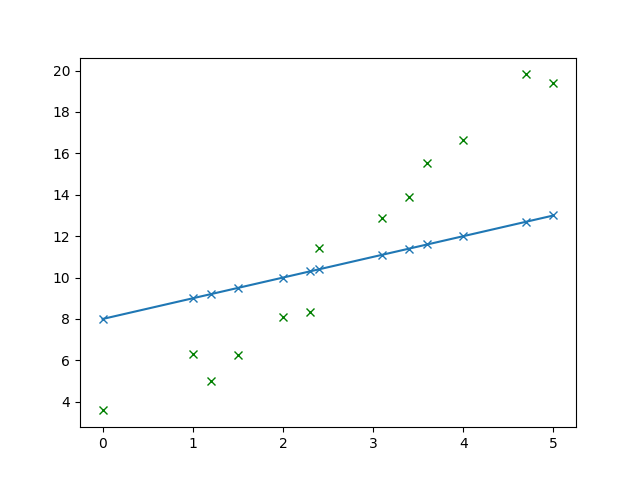

In [11]:
# Creating a line

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
# Lets create a known dataset

x_data = [0, 1, 1.2, 1.5, 2, 2.3, 2.4, 3.1, 3.4, 3.6, 4, 4.7, 5]
# Model y = 3.22x+2.3 + noise
y_data = [3.585, 6.321, 5.011, 6.259, 8.118, 8.35, 11.437, 12.869, 13.905, 15.535, 16.65, 19.814, 19.408]

m = 1
b = 8
x = np.array(x_data) # Creates 20 points between 0 and 5
y_hat = m * x + b # Note: y_hat is the estimate or result of our function estimator
plt.figure()
plt.plot(x, y_hat, '-x', x_data, y_data, 'xg')
plt.show()

X data point:  1.5
Y data pont:  6.259
Y result:  9.5
Error Difference:  -3.2409999999999997
[1.5 1.5]


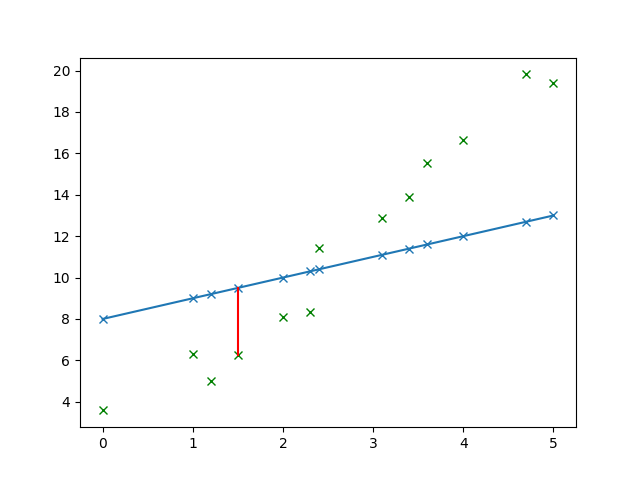

In [12]:
# Error Function

# One way we can determine error is by passing a given x value through our estimated function, get the resulting y then see the difference
# with the real y.

x_data_point = x_i = x_data[3]
print("X data point: ", x_i)
y_data_point = y_i = y_data[3]
print("Y data pont: ", y_data_point)
y_i_hat = m * x_i + b
print("Y result: ", y_i_hat)

def error_function(y_i, y_i_hat):
    return y_i - y_i_hat

print("Error Difference: ", error_function(y_data_point, y_i_hat))

# Visualization
h_line = np.array([[x_data[3], y_data_point], [x_data[3], y_i_hat]])
print(h_line[:, 0])
plt.figure()
plt.plot(x, y_hat, '-x', x_data, y_data, 'xg', h_line[:, 0], h_line[:, 1], 'r' )
plt.show()

Next we will want to accumulate the error for each point. 

Do you see a problem with accumulating error across the board? 

In [4]:
# The problem with our error function when we accumulate error

# Say we have 4 point
pt1 = [-3, -10] # diff is -6 - -10 = 4
pt2 = [-3, -5] # diff is -6 - -5 = -1
pt3 = [3, 12] # diff is 6 - 2 = -4
pt4 = [3, 3]

toy_data_set = np.array([pt1, pt2, pt3, pt4])


# Say this is our line 
mock_x =np.linspace(-5, 5, 20) 
m = 0
b = 0
y_estimation = m * mock_x  + b
plt.plot(mock_x, y_estimation, toy_data_set[:, 0], toy_data_set[:, 1], 'xg')

# What is the error between the line and the 

# Note: We can throw in our numpy arrays into our error function since numpy
# will treat the subtraction as a matrix operation (rather trying to subtract lists)
diff = error_function(toy_data_set[:, 1], m * toy_data_set[:, 0] + b)
print(diff)

# Then lets get accumulated error

def accumulated_error(error_np):
    return np.sum(error_np) # Lever numpy's sum function

print("Accumulated Error: ", accumulated_error(diff))

[-10  -5  12   3]
Accumulated Error:  0


Yikes! That is not a good look. The problem is that our negative error is cancelling out our positive error. Which is resulting in ~probably~ not the best line of best fit.

There are few ways we can make the error positive. 
- Take the absolute value of the error
- Put the error to an even power
- Shift all error to a positive value
- And more

Some are better than others for specific use cases. Lets go with putting the error to an even power - specifically the power of 2 (squared). Mostly since it will create a popular error function 😄

We can also change how we accumulate the error: 
- Adding together
- Subtracting together
- Taking Average
- Taking weighted average
- Really anything that combines the values



## A Math Recap! 

The line 
`y = f(x) = m * x + b`

The error function we will use

`E(y_i, y_i_hat) = (y_i - y_i_hat)^2` // note these are individual values

Then we have the accumulation, we decided to take an average

$Average\_Error(y, y_{hat}, n) = (1/n) * ( E(y_1, y_{1\_hat})) + E(y_2, y_{2\_hat}) + ... + E(y_n, y_{n\_hat}))$

Where y, and y_hat are all of the results (a series of the results)
And y_i and y_i_hat is a single result (data point)
And n is the number of data points

This can be written out like:

$Average_Error(y, y\_hat, n) = (1/n) * ( (y_1 - y_{1\_hat})^2 + (y_2 - y_{2\_hat})^2 + ... + (y_n - y_{n\_hat})^2)$

This new "Average_Error" function is called "Mean Squared Error"! or MSE for short.

Lets take a look at our example

In [5]:
# Lets generalize

def error_function(y, y_hat):
    return (y-y_hat)**2 # Note we cannot use a ^ here, that means to xor

def MSE(y, y_hat): # Can can pull the number of data points from our numpy object, which will be used in the mean call
    temp_sum = np.sum(error_function(y, y_hat))
    np_average = np.mean(temp_sum)
    return np_average

# Now lets take a look at our error

error = MSE(toy_data_set[:, 1], m * toy_data_set[:, 0] + b)
print("MSE: ", error)

MSE:  278.0


Back to our original data set! 

We want to find the MSE of our guessed line. 


In [6]:
# Lets put everything as numpy arrays now
x_data = np.array(x_data)
y_data = np.array(y_data)

m = 1
b = 8
x = np.linspace(0, 5, 20) # Creates 20 points between 0 and 5
y_hat = m * x_data + b # Note: y_hat is the estimate or result of our function estimator

error = MSE(y_data, y_hat)
print("MSE: ", error)

MSE:  201.323432


Now back to what we want. 

We want to minimize the error between our line and the data points we have. 

What mathematical concepts can we use find the minimum or maximum of a function? 

Derivatives! When you take the derivative of a function, at the point where you get 0 there is not change and it at a local maximum or minimum of that function. 

Lets look at different m and b values and plot the error.


m_to_try shape:  (80, 1)
b_to_try shape:  (1, 80)
errors shape:  (80, 80)


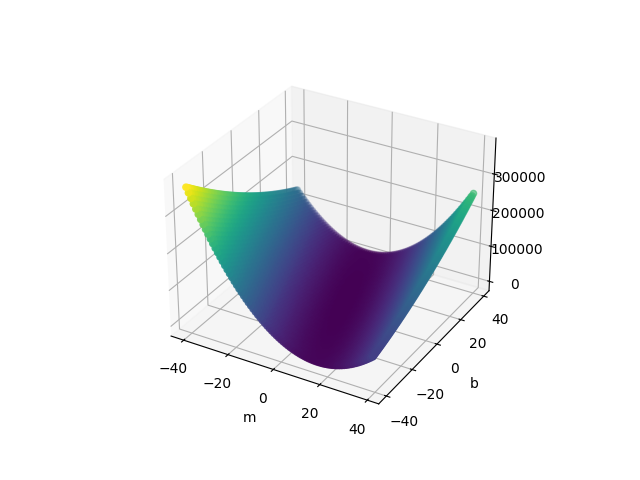

In [7]:
m_to_try = np.arange(-40, 40, 1).reshape(-1, 1)
b_to_try = np.arange(-40, 40, 1).reshape(1, -1)
errors = np.zeros([len(m_to_try), len(b_to_try[0])])

print("m_to_try shape: ", m_to_try.shape)
print("b_to_try shape: ", b_to_try.shape)
print("errors shape: ", errors.shape)

for m_index, m in enumerate(m_to_try):
    for b_index, b in enumerate(b_to_try[0]):
        y_hat = m * np.array(x_data) + b
        errors[m_index][b_index] = MSE(y_data, y_hat)

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(m_to_try, b_to_try, errors, c=errors, cmap="viridis")
ax.set_xlabel("m")
ax.set_ylabel("b")
plt.show()


Now we can brute force this by making the steps of m and b smaller and smaller until we get the precision we want. Or like previously mentioned we can take the derivative of the error function with respect to m and b. This allows us to leverage mathematics to decrease our computing time. 

## A derivative with respect

This is the function we want to take the derivative of:
$Average_Error(y, y\_hat, n) = (1/n) * ( (y_1 - y_{1\_hat})^2 + (y_2 - y_{2\_hat})^2 + ... + (y_n - y_{n\_hat})^2)$


To make our lives a bit easier, we are going to call this part:

$( (y_1 - y_{1\_hat})^2 + (y_2 - y_{2\_hat})^2 + ... + (y_n - y_{n\_hat})^2)$

$\sum_{i=1}^n (y_i - y_{i_hat})^2$

Which looks like

$Average_Error(y, y\_hat, n) = (1/n) * \sum_{i=1}^n (y_i - y_{i_hat})^2$

When we say "we take the derivitave of the function with respect to a variable", we treat all other variables like constants.

We want to find the b minimum, so we take the derative with respect to b ... for y_hat = m * x_i + b, means we can sub in for y_hat.


$(d/{db}) Average_Error(y, m * x + b, n) =  (d/{db}) (1/n) * \sum_{i=1}^n (y_i - (m * x_i + b))^2 $

The we set the left side to 0

$0 = (d/{db})(1/n) * \sum_{i=1}^n (y_i - (m * x_i + b))^2$

We get rid of (1/n)

$ 0 = (d/{db})\sum_{i=1}^n (y_i - (m * x_i + b))^2$

Lets look at one element

$(d/db)(y_i - (m * x_i + b))^2$
$= 2 * (d/db)(-b) * (m * x_i + b)$ 
$= 2 * -1 * (y_i - (m * x_i + b))$

Since we are taking the min, we can divide by our coefficents to simplify. 
$0 = (y_i - (m * x_i + b))$

So we can apply these steps to get:
$ 0 = (y_1 - (m * x_{1} + b)) + (y_2 - (m * x_{2} + b)) + ... +  (y_n - (m * x_{n} + b))$

Which is hte same as

$0 = \sum_{i=1}^n (y_i - (m * x_i + b))$

Then distribute and pull out b

$0 = \sum_{i=1}^n (y_i - m * x_i - b)$

Remember there are n amounts of b resulting in
 
$0 = (y_1 - m * x_{1} ) + (y_2 - m * x_{2} ) + ... +  (y_n - m * x_{n} ) - nb$

Which is 

$nb = \sum_{i=1}^n (y_i - m * x_i)$

Then isolate

$b = \sum_{i=1}^n (y_i - m * x_i)/n$


Now we would just plug in all of the y_i and x_i to get our optimal b! 

We can simplify the above further by distributing the n which gives us our average y and average x

$b = \sum_{i=1}^n (y_i/n - m * x_i/n)$

Which is the same as 

$b = \sum_{i=1}^n y_i/n - \sum_{i=1}^n m * x_i/n$

Which is the same as

$b = y_{average} - m * x_{average}$

## Finding m

Now we can find m using the b we found. 

$ 0 = (d/{dm})\sum_{i=1}^n (y_i - (m * x_i + b))^2$

Take derivative


$0 = -2 \sum_{i=1}^n x_i*(y_i - (m * x_i + b))$

Distribute 

$0 = \sum_{i=1}^n x_i*(y_i - m * x_i - b)$

Sub b

$0 = \sum_{i=1}^n x_i*(y_i - m * x_i - y_{average} + m * x_{average} )$

Begin to isolate m

$0 = \sum_{i=1}^n x_i*( - m * x_i + m * x_{average} + y_i - y_{average})$

$0 = \sum_{i=1}^n x_i*( m (- x_i + x_{average}) + y_i - y_{average})$

Seperate sums

$0 = \sum_{i=1}^n x_i *m (- x_i + x_{average}) + \sum_{i=1}^n xi*( y_i - y_{average})$

Continue isolating m

$\sum_{i=1}^n x_i *m (- x_i + x_{average}) = - \sum_{i=1}^n xi*( y_i - y_{average})$

m is not reliant on i, so we can pull it out of the sum 

$m * \sum_{i=1}^n x_i (- x_i + x_{average}) = - \sum_{i=1}^n xi*( y_i - y_{average})$

Simplify

$m  = - (\sum_{i=1}^n xi*( y_i - y_{average}))/(\sum_{i=1}^n x_i (- x_i + x_{average}))$

Distribute negative to bottom to make things look pretty

$m  = (\sum_{i=1}^n xi*( y_i - y_{average}))/(\sum_{i=1}^n x_i * (x_i - x_{average}))$

Now lets do the math to find the exact m and b value!


In [8]:
# $m  =\sum_{i=1}^n xi ( y_i - y_{average})/(x_i - x_{average})$

def find_m(y_data, x_data):
    num_inside = x_data * (y_data - np.average(y_data))
    dem_inside = x_data * (x_data - np.average(x_data))
    return np.sum( num_inside)/ np.sum(dem_inside)

found_m = find_m(y_data, x_data)
print(found_m)

# That seems pretty good! Its around 4 like we predicted before


3.5965602553870726


In [9]:
# Now with our found m we can find b
#$b = y_{average} - m * x_{average}$

def find_b(y_data, x_data, m):
    return np.average(y_data) - m * np.average(x_data)

found_b = find_b(y_data, x_data, found_m)
print(found_b)

1.8661260973663154


Now lets see the line of best fit!

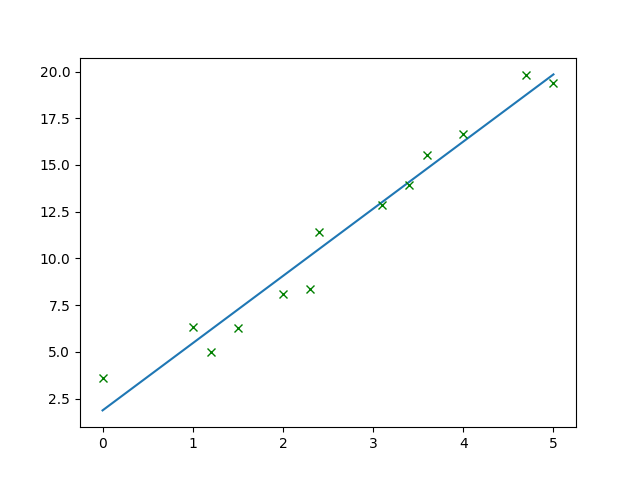

In [14]:

x = np.array(x_data) # Creates 20 points between 0 and 5
y_hat = found_m * x + found_b # Note: y_hat is the estimate or result of our function estimator
plt.figure()
plt.plot(x, y_hat, '-', x_data, y_data, 'xg')
plt.show()

Nice! All that for this! Pretty cool huh! (I guess). 

However you learned the basic steps of "Machine Learning", these steps are even applied up until neural networks, and are the baby steps of most machine learning (and beyond) algorithms.

Coding this from scratch is a big pain, its easy to create errors, and it would take some time to make this work for many data types, edge handling, and more. Thankfully a bunch of really smart people have create libraries for us to use, so lets take a look at those! Navigate to the Scikit learn python notebook. 